# Homework 4

Before you run your homework run the code below:

In [139]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from urllib.request import urlopen

assert os.path.exists('../homeworks/HW4.ipynb')

info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/hw-4-'+name,'w') as f:
    f.write(info)

In [140]:
with open('../other/hw-4-'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/hw-4-'+name)

## Task

Apply all of the supervised and unsupervised classification and clustering algorithms we learned so far for the [sonar dataset from UCI](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)).

The code for downloading the data is below. Don't load the data again and again in each subtask, refer the data as `SONAR` after you run the cell below.

In [141]:
with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data") as fil:
    SONAR = pd.read_csv(fil, delimiter=',', header=None)

Split the tasks into subtasks and into separate cells.  Also before your analysis for each subtask, write a short paragraph before explaining which algorithm you are going to use. Each subtask should look like this

## Subtask 1: K-nn Classification

For K-nn classification which is a supervised algorithm we need to divide the dataset into training and test. This is already a labeled dataset. The last column represents the type of solid whether it is rock or metal. So we have them as ys. I  preferred the "euclidean" type to divide the classes and decided to check the nearest 5 data points.


In [294]:
xs = SONAR.iloc[:,0:60]
ys = SONAR.iloc[:,60]

In [143]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25, train_size = 0.75)

In [144]:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean').fit(Xtrain, Ytrain)
predictions =  model.predict(Xtest)

Checking the accuracy score we see that the K-nn algorithm is not bad with classifying the SONAR dataset.

In [145]:
from sklearn.metrics import accuracy_score
cm = confusion_matrix(Ytest, predictions)
print(cm)
accuracy = accuracy_score(Ytest, predictions)
accuracy

[[23  4]
 [ 6 19]]


0.8076923076923077

## Subtask 2: K-means

K-means is an unsupervised algorithm to select clusters of a dataset. We basically have 3/4 of the data to train and the rest for test. Since there are 2 type(rock, metal) I take the number of clusters as 2 and the classification is done with the splitted X values. And "R" and "M" are not numerical values. That is why I converted them to 0 and 1 for accuracy score to function properly.

In [301]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25, train_size = 0.75)

In [302]:
from sklearn.cluster import KMeans
classifier = KMeans(n_clusters=2,random_state=1).fit(Xtest)
predicted = classifier.predict(Xtest)

In [303]:
labels = {"R":0, "M":1}
real = Ytest.map(lambda x: labels[x])

The accuracy score indicates that approximately half of the predictions are correct.

In [304]:
print(confusion_matrix(real,predicted))
accuracy_score(real,predicted)

[[14 10]
 [12 16]]


0.5769230769230769

# Subtask 3: Hiearchical clustering

Connecting each datapoints as clusters by their distance to eachother the algorithm creates connected clusters. Thus we can see the form of a tree and gives us a better idea of how the clusters emerges.

So, here is the code to plot a dendrogram by the smallest distances between points using the 'ward' method. I had to change M and R values to 1 and 2 because fcluster function automatically assignes 1 and 2 values. 

After prediction I changed the labels again to match the predicted ones. And accuracy score shows us the results which are not quite well. It is probable that this does not go well with SONAR dataset because there are many datapoints and since this method calculates the smallest distances to form clusters .

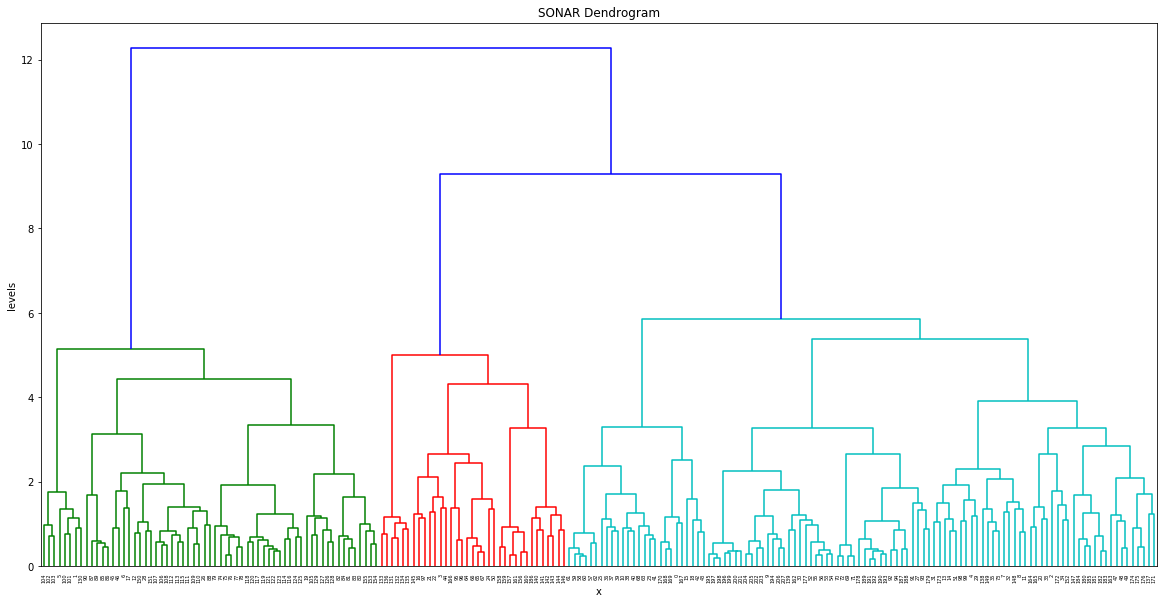

In [150]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.title('SONAR Dendrogram')
plt.xlabel('x')
plt.ylabel('levels')
dendrogram(linkage(xs, 'ward'))
plt.show()

In [151]:
from scipy.cluster.hierarchy import fcluster
predicted = fcluster(linkage(xs, 'ward'), 2, criterion='maxclust')

labels1 = {"M":1, "R":2}
real = ys.map(lambda x: labels1[x])

In [152]:
print(confusion_matrix(real,predicted))
accuracy_score(real,predicted)

[[36 75]
 [27 70]]


0.5096153846153846

## Subtask 4: Linear Regression

We have multiple columns and that means we have so many X values to predict Y which is either "rock" or "mine". So we have to reduce the number for a linear regression method. That is why we need to know the correlation between the columns. We use corr function with absolute values to have a correlation matrix. After selecting the upper triangle of the matrix we get rid of the columns which have more than 0.95 of correlation. 

We assign the new values as x. We still have lots of independent variables. y's are converted to 0 and 1 to have numerical data instead of strings. We fit the model and let it make predictions.In a new dataframe called 'df' we can see the real and predicted values together.

The summary tells us that especially 49, 54 and 56 have a strong impact on the result while R^2 values is around 0.70.

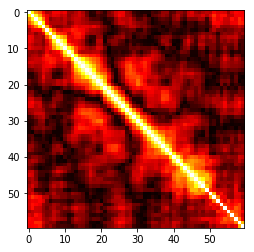

In [287]:
corr_matrix = SONAR.corr().abs()

from matplotlib import pyplot
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.show()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] < 0.05)]

In [288]:
selected_columns = to_drop
selected_columns

[17,
 18,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59]

In [289]:
x = SONAR.iloc[:,selected_columns]
y = SONAR.iloc[:,60:61]

In [290]:
y = y.replace(to_replace=['M', 'R'], value=[0, 1])

In [291]:
import numpy as np
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)

df = pd.DataFrame(np.c_[y,predictions],columns = ["real","predicted"])
df

,real,predicted
0,1.0,0.757661
1,1.0,1.180900
2,1.0,0.579951
3,1.0,0.465656
4,1.0,0.748072
5,1.0,0.944185
6,1.0,0.769213
7,1.0,0.391337
8,1.0,0.467509
9,1.0,0.489084


In [292]:
import statsmodels.api as sm
from scipy import stats

est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     60   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     9.242
Date:                Fri, 23 Nov 2018   Prob (F-statistic):           5.07e-26
Time:                        22:23:58   Log-Likelihood:                -92.617
No. Observations:                 208   AIC:                             267.2
Df Residuals:                     167   BIC:                             404.1
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
17             0.1586      0.287      0.552      0.5

## Subtask 5: Logistic Regression

After assigning train and test datas again the labels are converted to 0 and 1. Logistic regression model splits the data points into half by a hyperplane. Fitting the model and making predictions, the accuracy score gives us a considerably high ratio.

In [163]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size = 0.25, train_size = 0.75, random_state = 0)

In [164]:
labels = {"R":0, "M":1}
Ytrain = Ytrain.map(lambda x: labels[x])

labels = {"R":0, "M":1}
Ytest = Ytest.map(lambda x: labels[x])

In [165]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(Xtrain, Ytrain)
predictions = logisticRegr.predict(Xtest)

In [166]:
print(confusion_matrix(Ytest,predictions))
accuracy_score(Ytest,predictions)

[[15 11]
 [ 4 22]]


0.7115384615384616